# Bigdata Homework2
## Wang bingquan
## 1801212932

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv("climate_change_1.csv")
data1.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [31]:
train_set = data1[data1["Year"] <= 2006]
test_set = data1[data1["Year"] > 2006]

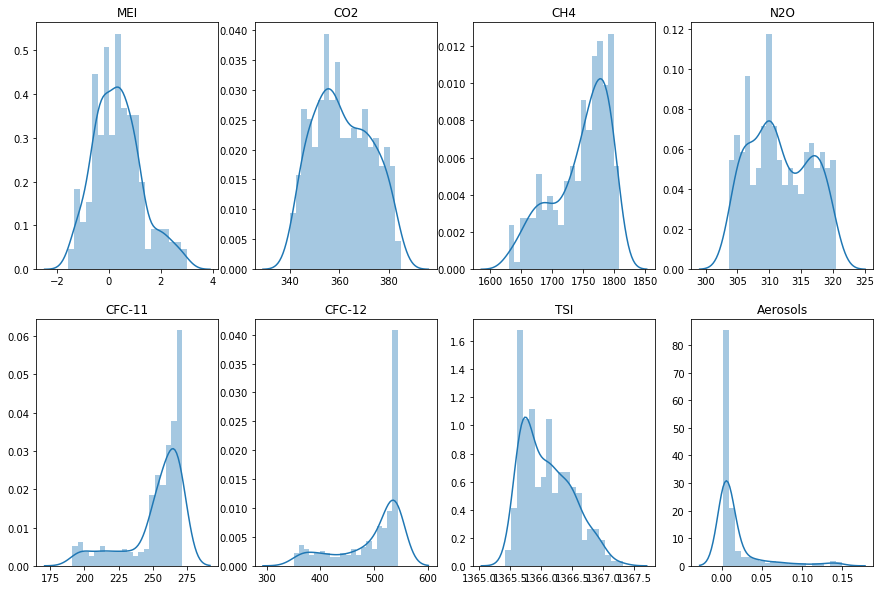

In [5]:
plt.figure(figsize = (15,10))
jj = 1
for ii in train_set.columns[2:-1]:
    plt.subplot(2,4,jj)
    sns.distplot(train_set[ii].tolist(),bins = 20)
    plt.title(ii)
    jj += 1
plt.show()
plt.close()

Most variables are not accordance with normal distribution!

# Problem 1

## 1.

In [13]:
def add_constant(x):
    return np.c_[x,np.ones(x.shape[0])]

In [33]:
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
X = add_constant(X)

In [34]:
def closed_form_1(X,Y):
    beta = np.linalg.inv(X.T@X)@X.T@Y
    return beta
beta = closed_form_1(X,Y)
beta_name = train_set.columns[2:-1].tolist()
beta_name.append("constant")
print (" closed form solution is :\n",pd.Series(beta,index = beta_name))

 closed form solution is :
 MEI           0.064205
CO2           0.006457
CH4           0.000124
N2O          -0.016528
CFC-11       -0.006630
CFC-12        0.003808
TSI           0.093141
Aerosols     -1.537613
constant   -124.594262
dtype: float64


## 2.

Temp = -124.5 + 0.0642*MEI + 0.0065*CO2 + 1.2404*10^(-4)*CH4 - 0.0165*N2O - 0.0066*CFC_11 + 0.0038*CFC_12 + 0.0931*TSI - 1.537* Aerosols + ε

In [35]:
def R_square_func(X,Y,beta):
    Y_est = X@beta.T
    R_square = 1 - np.sum((Y_est - Y)**2)/np.sum((Y - Y.mean())**2)
    return R_square
print ("R_square in trainning set:", R_square_func(X,Y,beta))

R_square in trainning set: 0.750893277052344


In [36]:
X = test_set.iloc[:,2:-1].values
Y = test_set.iloc[:,-1].values
X = add_constant(X)
print ("R_square in testing set:", R_square_func(X,Y,beta))

R_square in testing set: 0.18377835234677153


## 3.

In [28]:
def t_static(X,Y,beta):
    MSE = (Y - X@beta.T).T @ (Y - X@beta.T) / (X.shape[0]-X.shape[1])
    t_stat = beta / (np.sqrt(MSE * np.diag(np.linalg.inv(X.T @ X))))
    return t_stat
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
X = add_constant(X)
pd.Series(t_static(X,Y,closed_form_1(X,Y)),index = beta_name)

MEI         9.923226
CO2         2.826420
CH4         0.240469
N2O        -1.929726
CFC-11     -4.077834
CFC-12      3.757293
TSI         6.312561
Aerosols   -7.210301
constant   -6.265174
dtype: float64

T statistic of CH4 and N2O are lower than 1.96. Therefore, most variables are significant at 95% confidence interval except CG4 and N2O.

## 4.

Necessary conditon for the closed form is:
1. The number of variables is lower than the number of obervations
2. The conditional mean of residuals should be zero
3. There is no multi-collinearity (or perfect collinearity)
4. Spherical errors: There is homoscedasticity and no autocorrelation

In [162]:
data2 = pd.read_csv("climate_change_2.csv")
data2.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,NO,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,2.63859,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,2.63371,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,2.63322,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,2.63135,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,2.64840,0.149


In [215]:
train_set = data2[data1["Year"] <= 2006]
test_set = data2[data1["Year"] > 2006]
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
X = add_constant(X)
beta = closed_form_1(X,Y)
beta_name = train_set.columns[2:-1].tolist()
beta_name.append("constant")
print ("The coef of data in climate_change_2.csv is : \n",pd.Series(beta,index = beta_name))

The coef of data in climate_change_2.csv is : 
 MEI           0.231868
CO2           0.006237
CH4          -0.021632
N2O          -0.016468
CFC-11       -0.006606
CFC-12        0.003793
TSI           0.093149
Aerosols     -1.537612
NO           21.831558
constant   -146.449173
dtype: float64


In [181]:
for ii in train_set.columns[2:-2]:
    print ("The correlation coefficient between NO and ",ii,"is", pearsonr(train_set["NO"],train_set[ii])[0])

The correlation coefficient between NO and  MEI is -0.033419301432253114
The correlation coefficient between NO and  CO2 is 0.8772796331557442
The correlation coefficient between NO and  CH4 is 0.9999999999999998
The correlation coefficient between NO and  N2O is 0.8998386437662851
The correlation coefficient between NO and  CFC-11 is 0.7799040200233142
The correlation coefficient between NO and  CFC-12 is 0.9636162477558016
The correlation coefficient between NO and  TSI is 0.24552844224614467
The correlation coefficient between NO and  Aerosols is -0.26780918608935034


### Reason
We can find that NO is highly correlated with CO2, CH4, N2O and CFC_12. It means that there exists perfect collinearity in the model and the result of closed form solution is unreasonable.

# Problem 2

## 1.

### Loss function 
The loss function of model with L2 regularization is 

$$
\frac{1}{2m}[\sum_{i = 1}^{m} (h_{\theta}(x^{i})-y^{i})^2 + \lambda\sum_{j = 1}^{n} \theta_{j}^{2}]
$$

The loss function of model with L1 regularization is 

$$
\frac{1}{2m}[\sum_{i = 1}^{m} (h_{\theta}(x^{i})-y^{i})^2 + \lambda\sum_{j = 1}^{n} |\theta_{j}|]
$$

## 2.

In [18]:
def closed_form_2(X,Y,Lambda):
    beta = np.linalg.inv(X.T@X + Lambda*np.eye(X.shape[1]))@X.T@Y
    return beta
train_set = data1[data1["Year"] <= 2006]
test_set = data1[data1["Year"] > 2006]
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
X = add_constant(X)
beta_name = train_set.columns[2:-1].tolist()
beta_name.append("constant")
print ("The closed form solution for linear model with L2 regularization is: \n", 
       pd.Series(closed_form_2(X,Y,10),index = beta_name))
beta = closed_form_2(X,Y,10)
print ("R_square in train set is:", R_square_func(X,Y,beta))
X = test_set.iloc[:,2:-1].values
Y = test_set.iloc[:,-1].values
X = add_constant(X)
print ("R_square in test set is:", R_square_func(X,Y,beta))

The closed form solution for linear model with L2 regularization is: 
 MEI         0.040543
CO2         0.008146
CH4         0.000205
N2O        -0.016081
CFC-11     -0.006361
CFC-12      0.003689
TSI         0.001265
Aerosols   -0.024433
constant   -0.000220
dtype: float64
R_square in train set is: 0.6803719394091412
R_square in test set is: -0.7061640572891279


Robustness means that the model is resistant to the outliers in the data. By L2 regularization, the coefficients all shrink so that it is not sensitive to the outliers in the data comparing to the linear model. Therefore, it is more robust than linear model.   

## 3.

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


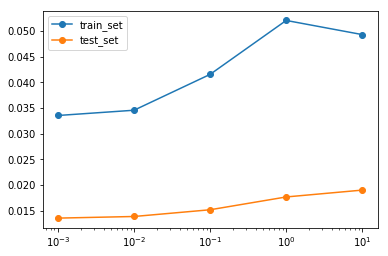

In [20]:
def MSE(X,Y,beta):
    return np.sum((X@beta.T - Y)**2)/X.shape[0]

def Kfold_cv(X,Y,Lambda,folds = 5):
    MSE_res = []
    X_split = np.array_split(X,folds,axis = 0)
    Y_split = np.array_split(Y,folds)
    for ii in range(folds):
        order = list(range(folds))
        order.pop(ii)
        X_temp = []
        Y_temp = []
        for jj in order:
            X_temp.append(X_split[jj])
            Y_temp.append(Y_split[jj])
        X_train = np.concatenate(X_temp,axis = 0)
        Y_train = np.concatenate(Y_temp,axis = 0)
        X_val = X_split[ii]
        Y_val = Y_split[ii]
        beta = closed_form_2(X_train,Y_train,Lambda)
        MSE_res.append(MSE(X_val,Y_val,beta))
        #print (R_square_func(X_val,Y_val,beta))
    return np.mean(MSE_res)

train_set = data1[data1["Year"] <= 2006]
test_set = data1[data1["Year"] > 2006]

res_train_set = []
res_test_set = []
Lambda_list = [10, 1, 0.1, 0.01, 0.001]
for Lambda in Lambda_list:
    X = train_set.iloc[:,2:-1].values
    Y = train_set.iloc[:,-1].values
    X = add_constant(X)
    res_train_set.append(Kfold_cv(X,Y,Lambda,5))
    beta = closed_form_2(X,Y,Lambda)
    X = test_set.iloc[:,2:-1].values
    Y = test_set.iloc[:,-1].values
    X = add_constant(X)
    res_test_set.append(MSE(X,Y,beta))
fig1, ax1 = plt.subplots()
ax1.plot(Lambda_list,res_train_set,"o-",label = "train_set")
ax1.plot(Lambda_list,res_test_set,"o-",label = "test_set")
ax1.set_xscale('log')
ax1.set_xticks(Lambda_list)
ax1.legend()
#ax1.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
fig1.show()

In [21]:
print ("The lowest MSE is :",res_test_set[-1])
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
X = add_constant(X)
beta = closed_form_2(X,Y,0.001)
print ("R_square in train set is :", R_square_func(X,Y,beta))
X = test_set.iloc[:,2:-1].values
Y = test_set.iloc[:,-1].values
X = add_constant(X)
print ("R_square in test set is :", R_square_func(X,Y,beta))

The lowest MSE is : 0.013554345707263308
R_square in train set is : 0.7168000467678235
R_square in test set is : -0.21604537017053382


As we can see from the picture, the higher lambda, the higher R_square in test set. Therefore, the best lambda is 0.001.

# Problem 3

## 1.

In [25]:
train_set = data1[data1["Year"] <= 2006]
test_set = data1[data1["Year"] > 2006]
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
print (pd.DataFrame(X).corr())

          0         1         2         3         4         5         6  \
0  1.000000 -0.041147 -0.033419 -0.050820  0.069000  0.008286 -0.154492   
1 -0.041147  1.000000  0.877280  0.976720  0.514060  0.852690  0.177429   
2 -0.033419  0.877280  1.000000  0.899839  0.779904  0.963616  0.245528   
3 -0.050820  0.976720  0.899839  1.000000  0.522477  0.867931  0.199757   
4  0.069000  0.514060  0.779904  0.522477  1.000000  0.868985  0.272046   
5  0.008286  0.852690  0.963616  0.867931  0.868985  1.000000  0.255303   
6 -0.154492  0.177429  0.245528  0.199757  0.272046  0.255303  1.000000   
7  0.340238 -0.356155 -0.267809 -0.337055 -0.043921 -0.225131  0.052117   

          7  
0  0.340238  
1 -0.356155  
2 -0.267809  
3 -0.337055  
4 -0.043921  
5 -0.225131  
6  0.052117  
7  1.000000  


As we can see that there does not exist perfect collinearity. Therefore, we can just drop those insignificant(< 95%) variables including CH4 and N2O. 

## 2.

In [42]:
select_feature = ['MEI', 'CO2', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']
X = train_set[select_feature].values
Y = train_set["Temp"].values
X = add_constant(X)
select_feature.append("constant")
beta = closed_form_1(X,Y)
print ("closed solution is :\n", pd.Series(beta,index = select_feature))
print ("R_square in train set is : \n",R_square_func(X,Y,beta))
X = test_set[select_feature[:-1]].values
Y = test_set["Temp"].values
X = add_constant(X)
print ("R_square in test set is : \n",R_square_func(X,Y,beta))

closed solution is :
 MEI           0.064214
CO2           0.004061
CFC-11       -0.004314
CFC-12        0.002430
TSI           0.088520
Aerosols     -1.566509
constant   -122.252662
dtype: float64
R_square in train set is : 
 0.7474670639113032
R_square in test set is : 
 0.06842409891621914


The R_square in test set and train set are higher than problem 2.

# Problem 4

In [60]:
def normalization(x, method = 1):
    if method == 1:
        x_max = x.max(axis = 0)
        x_min = x.min(axis = 0)
        return (x - x.mean(axis = 0))/(x_max - x_min)
    else:
        return (x - x.mean(axis = 0))/x.std()

train_set = data1[data1["Year"] <= 2006]
test_set = data1[data1["Year"] > 2006]
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
X = normalization(X)
Y = normalization(Y)
X = add_constant(X)
def J_deriv(theta,x,y,i):
    return (x@theta.T - y)@x[:,i].T
def gradientDescent(theta,x,y,threshold,alpha = 0.1,max_iter = 600000):
    i = 0
    MSE_delta = np.sum((x@theta.T - y)**2)/2/x.shape[0] - 0
    while abs(MSE_delta) > threshold and i <= max_iter:
        
        delta_theta = []
        for ii in range(x.shape[1]):
            delta_theta.append(J_deriv(theta,x,y,ii)/x.shape[0])
        MSE_old = np.sum((x@theta.T - y)**2)/2/x.shape[0]
        theta = theta - np.array(delta_theta)*alpha
        MSE_delta = np.sum((x@theta.T - y)**2)/2/x.shape[0] - MSE_old
        i = i+1
        if i % 10000 == 0:
            print ("Iteration time is :", i)
            print ("MSE:",np.sum((x@theta.T - y)**2)/2/x.shape[0])
    print ("total iteration times:", i)
    return theta,(np.sum((x@theta.T - y)**2)/2/x.shape[0])
theta_orgin = np.zeros(X.shape[1])
gradientDescent_res = gradientDescent(theta_orgin,X,Y,10**(-10),0.1)
feature_name = train_set.columns[2:-1].tolist()
feature_name.append("constant")
print ("coefficients are : \n", pd.Series(gradientDescent_res[0],index = feature_name ))
print ("MSE in train set is :",gradientDescent_res[1])

Iteration time is : 10000
MSE: 0.003984415259488536
Iteration time is : 20000
MSE: 0.003937984073487123
Iteration time is : 30000
MSE: 0.003919228803900938
Iteration time is : 40000
MSE: 0.003911621233312302
Iteration time is : 50000
MSE: 0.003908533893148411
total iteration times: 57129
coefficients are : 
 MEI         2.882692e-01
CO2         2.823464e-01
CH4         2.345232e-02
N2O        -2.398049e-01
CFC-11     -4.861857e-01
CFC-12      6.703157e-01
TSI         1.711908e-01
Aerosols   -2.230563e-01
constant    1.514743e-14
dtype: float64
MSE in train set is : 0.003907533816166907


### MSE of closed form solution

In [61]:
train_set = data1[data1["Year"] <= 2006]
test_set = data1[data1["Year"] > 2006]
X = train_set.iloc[:,2:-1].values
Y = train_set.iloc[:,-1].values
X = normalization(X)
Y = normalization(Y)
X = add_constant(X)
beta = np.linalg.inv(X.T@X)@X.T@Y
print ("coefficients are : \n", pd.Series(beta,index = feature_name ))
print ("MSE in train set is :",np.sum((X@beta.T - Y)**2)/2/X.shape[0])

coefficients are : 
 MEI         2.884523e-01
CO2         2.834028e-01
CH4         2.165691e-02
N2O        -2.715384e-01
CFC-11     -5.206330e-01
CFC-12      7.224580e-01
TSI         1.724250e-01
Aerosols   -2.225850e-01
constant    1.520528e-14
dtype: float64
MSE in train set is : 0.003906424994701318
